## Analyze A/B Test Results


#### Part I - Probability

To get started, let's import our libraries.

In [78]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)
df = pd.read_csv('ab_data.csv')

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [79]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

We will take a look into the df by using shape(), and we found that the df contains 294478 rows

In [80]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [81]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [82]:
df[df['converted'] == 1].shape[0]/df.shape[0]*100

11.96591935560551

e. The number of times the `new_page` and `treatment` don't match.

In [83]:

newPt= df[(df['landing_page'] == "new_page") & (df['group'] !="treatment" )]

newPt.count()


user_id         1928
timestamp       1928
group           1928
landing_page    1928
converted       1928
dtype: int64

In [84]:
oldPt= df[(df['landing_page'] == "old_page") & (df['group'] !="control" )]
oldPt.count()

user_id         1965
timestamp       1965
group           1965
landing_page    1965
converted       1965
dtype: int64

f. Do any of the rows have missing values?

In [85]:
df.isnull().sum()


user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [86]:
df2=df.copy()

In [87]:
df2.drop(oldPt.index, inplace=True)
df2.drop(newPt.index, inplace=True)


In [88]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [89]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [90]:
df2['user_id'].duplicated().count()-df2['user_id'].nunique()

1

c. What is the row information for the repeat **user_id**? 

In [91]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = df2[df2['user_id'].duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
duplicateRowsDF

Duplicate Rows except first occurrence based on all columns are :


,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [92]:
df2['user_id'].drop_duplicates(inplace=True)
df2['user_id'].duplicated().sum()

0

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [93]:

prob1=df2.converted.mean()
"{:.4f}%".format(prob1)#approxmitly

'0.1196%'

b. Given that an individual was in the `control` group, what is the probability they converted?

In [94]:
prob2=df2.query("group == 'control'")['converted'].mean()
prob2*100#approxmitly

12.038630450046121

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [95]:
prob3=df2.query("group == 'treatment'")['converted'].mean()
prob3*100#approxmitly

11.880724790277405

d. What is the probability that an individual received the new page?

In [96]:
prob4=df2.query('landing_page == "new_page"')['user_id'].nunique()/df2.shape[0]*100
"{:.4f}%".format(prob4)#approxmitly

'50.0060%'

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**if we look into the indvisuals who converted regredeless the page they received we will see 11% who actuaally converted but when we look into the part d we will notice that the new page was tested by 50% and only we get 11% who actually converted regradeless they tested it or not.**





<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.


$$H_0: \mu_{old}  \geq \mu_{new}$$


$$H_1: \mu_{old} < \mu_{new}$$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>


a. What is the **conversion rate** for $p_{new}$ under the null? 

because we assumed the are both equdl which mean each proportion will have the same probabilty

In [97]:
convnew=df2.converted.mean()
convnew*100

11.959667567149026

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [98]:
convold=df2.converted.mean()
convold*100

11.959667567149026

c. What is $n_{new}$, the number of individuals in the treatment group?

In [99]:
Nnew= df2.query('landing_page == "new_page"').shape[0]
Nnew

145311

d. What is $n_{old}$, the number of individuals in the control group?

In [100]:
Nold= df2.query('landing_page == "old_page"').shape[0]
Nold

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [101]:
new_page_converted = np.random.choice([0, 1], Nnew, p = [convnew, 1-convnew])


f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [102]:
old_page_converted = np.random.choice([0, 1], Nold, p = [convold, 1-convold])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [135]:
obs_diff =  prob3-prob2
obs_diff

-0.0015790565976871451

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

## we will bootstrap our diffrence in mean 10000 times to see the sampling distribution how look like.


In [106]:
p_diffs = []
size = df2.shape[0]
for _ in range(10000):
    samp = df.sample(size, replace=True)
    old_page_sim = np.random.choice([0,1], Nold, p = (convold, 1 - convold))
    new_page_sim = np.random.choice([0,1], Nnew, p = (convnew, 1 - convnew))
    p_diffs.append(new_page_sim.mean() - old_page_sim.mean())
    
null_vals = np.random.normal(0, np.std(p_diffs) , 10000)


In [107]:
p_diffs = np.array(p_diffs)


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  


yes it is the ditribution is normal and the mean is around 0 as what it have to be if we stick to the null

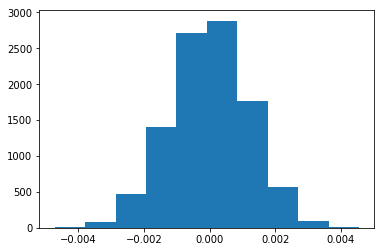

In [108]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

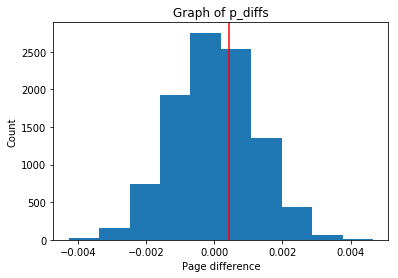

In [132]:
plt.hist(null_vals);

plt.title('Graph of p_diffs')
plt.xlabel('Page difference') 
plt.ylabel('Count') 

plt.axvline(x= obs_diff, color='r');

In [136]:
p_val=(null_vals > obs_diff).mean()
p_val

0.90400000000000003

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**we will calculate the p-value. and then to accept the null hypothesis p-value should be greater than the suggested one to accept the null hypothesis. According to our 0.5 we have a population above the real difference, which states that the new page isn't doing significantly better. New page is worse than the old page, so we should stick to the null also our p val is 0.0366 if it was lower than 0.01 we would move from null and choose the alternative
**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [111]:
import statsmodels.api as sm

convert_old = df2.query("landing_page == 'old_page'")['converted'].sum()
convert_new = df2.query("landing_page == 'new_page'")['converted'].sum()
n_old = Nold
n_new = Nnew
print(n_new , n_old ,convert_new ,convert_old)


145311 145274 17264 17489


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.


 [I found this peace of code fro the cell below and the next question from here ](https://github.com/ShimaaElabd/Analyze_AB_Test_Results_Notebook/blob/master/Analyze_ab_test_results_notebook.ipynb)


In [112]:
#z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])

z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new, convert_old]),np.array([n_new, n_old]), alternative = 'larger')
z_score, p_value

(-1.3116075339133115, 0.90517370514059103)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The z-score here is -1.31 inside our critical value of 1.959 and the p-value is still large, So it is likely that our statistic is from the null
This means the z-score and p-value agree with the findings in parts j and k that we cannot reject the null hypothesis. **

<a id='regression'></a>
### Part III - A regression approach



a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**logistic regression and we will use binary values .**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [113]:
import statsmodels.api as sm #imorting
df2['ab_page'] = pd.get_dummies(df2['group'])['control'] #then we will get our duumy variables for the group  
df2['intercept'] = 1 #then we will creat an interception
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [114]:
from scipy import stats

stats.chisqprob = lambda chisq, df2: stats.chi2.sf(chisq, df2)

In [115]:
log_mod1 = sm.Logit(df2['converted'], df2[['intercept','ab_page']])


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [116]:
results = log_mod1.fit()
results.summary()
# i had a problom with  "module 'scipy.stats' has no attribute 'chisqprob" so i used summary2
#or by importing stats for scipy

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Fri, 16 Jul 2021   Pseudo R-squ.:               8.085e-06
Time:                        11:15:17   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0038      0.008   -247.147      0.000      -2.020      -1.988
ab_page        0.0150      0.011      1.312      0.190      -0.007       0.037
==============================================================================
"""

In [117]:
np.exp(results.params)

intercept    0.134825
ab_page      1.015110
dtype: float64

In [118]:
1/np.exp(results.params)

intercept    7.416995
ab_page      0.985115
dtype: float64

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**here it is 0.190 and it differ from the part || 0.227 was much higher and we are comparing the conversion rate   .**


### Logistic regression

     H0:pnew−pold=0

     H1:pnew−pold!=0
     
###  Part2

     H0:pnew−pold<=0

     H1:pnew−pold>0


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**in my opinion, we only have one term to decide whether we will accept the null or reject it nut adding more terms will enable us to see other factors that might be important to our decision. however, It will be a good idea to add some value to additional factors such as the duration of testing. However, we need to take into account if there are correlated errors or outliers introduced in the model due to these factors then the r-squared value might deteriorate. Multi-collinearity should also be taken care of in this case**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.


 [I found this peace of code fro the cell below and the next question from here ](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)



In [119]:
countries = pd.read_csv('countries.csv')

In [120]:
df_new = countries.set_index('user_id').join(df2.set_index('user_id'), how='inner') #
df_new.head()


,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [121]:
df_new['country'].unique() #exploring the dataframe

array(['US', 'UK', 'CA'], dtype=object)

In [122]:
df_new[['CA', 'US', 'UK']] = pd.get_dummies(df_new['country']) #getting dummy variables 
df_new['intercept'] = 1 #then we will creat an interception
logit_mod2 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'CA', 'US']])
results = logit_mod2.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            3
Date:                Fri, 16 Jul 2021   Pseudo R-squ.:               2.324e-05
Time:                        11:15:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1758
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0042      0.009   -224.561      0.000      -2.022      -1.987
ab_page        0.0150      0.011      1.308      0.191      -0.007       0.037
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
US             0.0099      0.013      0.744      0.457      -0.016       0.036
==============================================================================
"""

In [123]:
np.exp(results.params)


intercept    0.134765
ab_page      1.015064
CA           0.960068
US           1.009938
dtype: float64

In [124]:
1/np.exp(results.params)

intercept    7.420336
ab_page      0.985160
CA           1.041593
US           0.990160
dtype: float64

In [125]:
df_new['ab_UK'] = df_new['ab_page'] * df_new['UK']
df_new['ab_US'] = df_new['ab_page'] * df_new['US']
lm3 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK' , 'US', 'ab_UK', 'ab_US']])


In [126]:
df_new['ab_UK'] = df_new['ab_page'] * df_new['UK']
df_new['ab_US'] = df_new['ab_page'] * df_new['US']
lm3 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK' , 'US', 'ab_UK', 'ab_US']])
results = lm3.fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            5
Date:                Fri, 16 Jul 2021   Pseudo R-squ.:               3.483e-05
Time:                        11:15:19   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1918
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0715      0.037    -55.798      0.000      -2.144      -1.999
ab_page        0.0674      0.052      1.297      0.195      -0.034       0.169
UK             0.0644      0.038      1.678      0.093      -0.011       0.140
US             0.0901      0.040      2.225      0.026       0.011       0.169
ab_UK         -0.0469      0.054     -0.872      0.383      -0.152       0.059
ab_US         -0.0783      0.057     -1.378      0.168      -0.190       0.033
==============================================================================
"""

In [127]:
np.exp(results.params)


intercept    0.126002
ab_page      1.069775
UK           1.066520
US           1.094247
ab_UK        0.954208
ab_US        0.924703
dtype: float64

In [128]:
1/np.exp(results.params)

intercept    7.936353
ab_page      0.934776
UK           0.937629
US           0.913871
ab_UK        1.047989
ab_US        1.081428
dtype: float64

OUR BASELINE IS CA. ALSO, ALL VARIABLES DO NOT HAVE A SIGNIFICANT P-VALUE. FURTHERMORE, US PEOPLE ARE 1.009 TIMES THAN UK AND CA PEOPLE ARE 0.9 TIMES ARE WILLING TO CONVERT. IN ADDITION, WE DON'T HAVE A GOOD EVIDENCE THAT WE HAVE TO ACCEPT THE ALTERNATIVE DUE TO THE LACK OF STATISTICALLY SIGNIFICANT EVIDENCE TO REJECT THE NULL AND FAVOR THE ALTERNATIVE.

In [129]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0